In [1]:
"""
Created on Fri Sep 22 12:26:33 2017

@author: Manikanda Krishnan V (06-02-02-10-22-17-1-14787)
"""


import numpy as np
from skimage import io,color,transform,img_as_ubyte
import matplotlib.pyplot as plt

An image is padded with extra pixels in order to perform the convolution operation on the boundary pixels.
Different types of padding lead to different effects. 

Zero Padding - The boundary are padded with pixels having value 0. This corresponds to ignoring the filter parameters that are outside the image. The disadvantage of this scheme is that it might cause sharp discontinuities at the boundary leading to creation of high frequency components.

Periodic Padding - In this scheme the image is repeated(tiled). This corresponds to periodic convolution, images generally do not satisfy this assumption i.e the texture on the right border can be very different from the left border etc, hence this also leads to discontinuities.

Symmetric Padding - In this scheme the pixels are reflected across the boundary. This leads to smoother transitions at the boundary preventing the creation of high frequency components

In [2]:
def padImage(im,filter_shape,padding_type="zero") :
    im_size = im.shape 
    padding_thickness = [x/2 for x in filter_shape]
    lower_corner = (padding_thickness[0]+im_size[0],padding_thickness[1]+im_size[1])
    im_col_flipped = im[:,-1::-1]
    im_row_flipped = im[-1::-1,:]
    im_both_flipped = im[-1::-1,-1::-1]
    zeros = np.zeros(im_size)
    if padding_type == "zero" :
            new_im = np.vstack([np.hstack([zeros,zeros,zeros]),
                                np.hstack([zeros,im,zeros]),
                                np.hstack([zeros,zeros,zeros])])

    elif padding_type == "symmetric" :
            new_im = np.vstack([np.hstack([im_both_flipped,im_row_flipped,im_both_flipped]),
                                np.hstack([im_col_flipped,im,im_col_flipped]),
                                np.hstack([im_both_flipped,im_row_flipped,im_both_flipped])])
    elif padding_type == "periodic" :
            new_im = np.vstack([np.hstack([im,im,im]),
                                np.hstack([im,im,im]),
                                np.hstack([im,im,im])])

    return new_im[im_size[0]-padding_thickness[0]:2*im_size[0]+padding_thickness[0],im_size[1]-padding_thickness[1]:2*im_size[1]+padding_thickness[1]]


In [3]:
#reading various types of images
astronomy_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\astronomy.jpg" #image from hubble telescope
ocr_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\ocr.jpg"
natural_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\natural.jpg"
biological_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\biological.png"
padding_type = ["zero","symmetric","periodic"]

astronomy = color.rgb2gray(io.imread(astronomy_path))
ocr = color.rgb2gray(io.imread(ocr_path))
natural = color.rgb2gray(io.imread(natural_path))
biological = color.rgb2gray(io.imread(biological_path))


Astronomical images of distant galaxies almost look the same throughout, this makes them well suited for symmetric and periodic padding. But the dark background(space) does not cause very sharp discontinuities even with zero padding 

astronomy - original


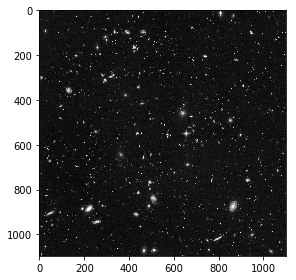

astronomy - zero


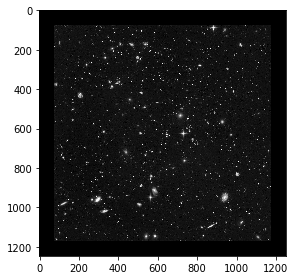

astronomy - symmetric


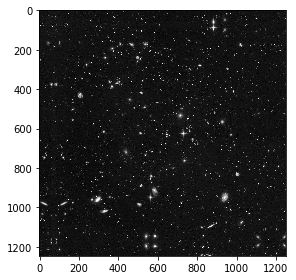

astronomy - periodic


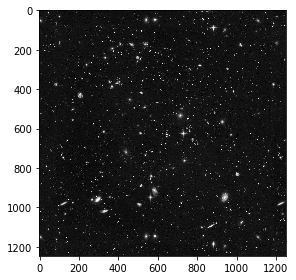

In [4]:
print  "astronomy - original"
io.imshow(astronomy)
plt.show()
for padding in padding_type :
    padded = padImage(astronomy,(150,150),padding)
    print "astronomy - {}".format(padding)
    io.imshow(padded)
    plt.show()

The texture present in natural images generally have very smooth transitions, these images also cover a large region, hence the texture present at one side is usually different compared to the opposite side. Hence these images are well suited for symmetric padding

natural - original


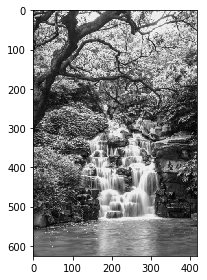

natural - zero


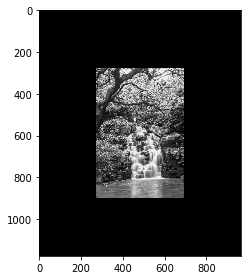

natural - symmetric


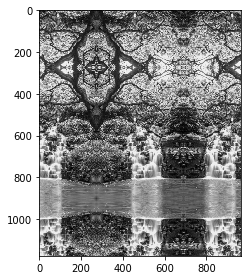

natural - periodic


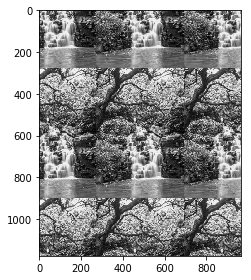

In [9]:
print  "natural - original"
io.imshow(natural)
plt.show()
for padding in padding_type :
    padded = padImage(natural,(550,550),padding)
    print "natural - {}".format(padding)
    io.imshow(padded)
    plt.show()

OCR images, there is generally spacing between words,letters and pages and this is pretty much of uniform intensity , hence they are suited for symmetric padding or periodic padding

ocr - original


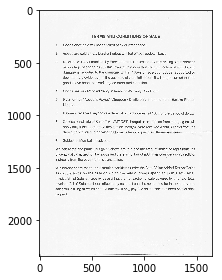

ocr - zero


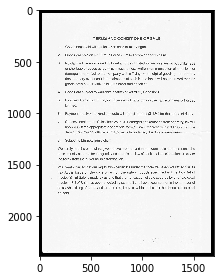

ocr - symmetric


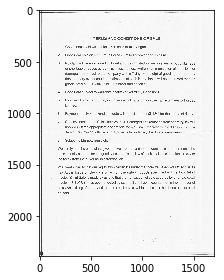

ocr - periodic


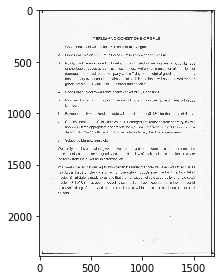

In [6]:
print  "ocr - original"
io.imshow(ocr)
plt.show()
for padding in padding_type :
    padded = padImage(ocr,(50,50),padding)
    print "ocr - {}".format(padding)
    io.imshow(padded)
    plt.show()

Biological images also have smooth transitions hence they are suited for symmetric padding. They might also  have certain components/structures that repeat often hence periodic padding might also be useful.

biological - original


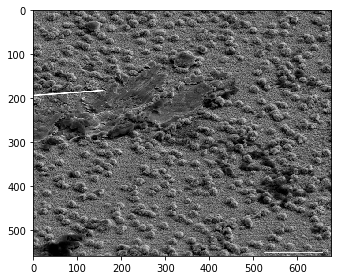

biological - zero


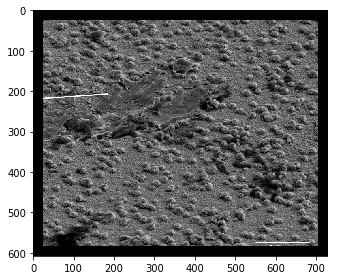

biological - symmetric


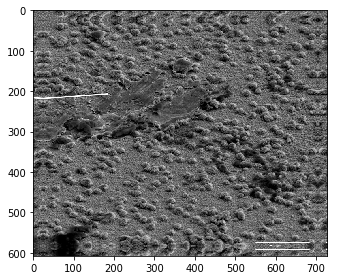

biological - periodic


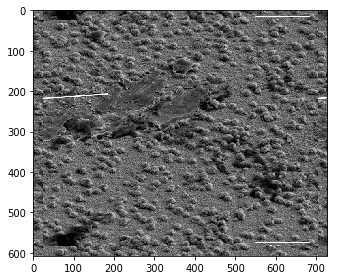

In [7]:
print  "biological - original"
io.imshow(biological)
plt.show()
for padding in padding_type :
    padded = padImage(biological,(50,50),padding)
    print "biological - {}".format(padding)
    io.imshow(padded)
    plt.show()

In all the above images we notice that zero padding leads to very obvious discontinuities and symmetric padding leads to least amount of discontinuity at  the boundary.